# 数据导入：

In [68]:
import os
imdb_dir = 'data\\aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name=os.path.join(train_dir, label_type)
    
    count =0 
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            with open(os.path.join(dir_name, fname), encoding='utf-8') as f:
                texts.append(f.read())

            count += 1
            if label_type == 'neg':
                if count %100 == 0:
                    print('neg')
                labels.append(0)
            else:
                labels.append(1)

neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg


In [69]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
maxlen = 200
max_words = 9000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels) # label是正负评论，正是1，负是0

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [70]:
training_samples = 10000
validation_samples = 2000

x_train = data[:training_samples] 
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

[Keras中文文档](https://keras-cn.readthedocs.io/en/latest/preprocessing/text/)

In [8]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN
from keras.layers import LSTM

In [ ]:
max_features = max_words

model = Sequential()
model.add(Embedding(max_features, 32, input_length=None))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [124]:
history = model.fit(x_train, y_train,
                    epochs=3,
                    batch_size=128,
                    validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/3
8000/8000 [==============================] - 8s 1ms/step - loss: 0.0326 - acc: 0.9927 - val_loss: 0.6063 - val_acc: 0.7820
Epoch 2/3
8000/8000 [==============================] - 8s 1ms/step - loss: 0.0197 - acc: 0.9964 - val_loss: 0.5283 - val_acc: 0.8220
Epoch 3/3
8000/8000 [==============================] - 8s 1ms/step - loss: 0.0140 - acc: 0.9971 - val_loss: 0.6182 - val_acc: 0.7965


In [21]:
# word_index = tokenizer.word_index
# index_word = tokenizer.index_word

In [122]:
comment = 'this is a stupid movie'.split(' ')
INDEX=[]
for i in comment:
    INDEX.append(word_index[i])
INDEX = np.array(INDEX)

In [123]:
model.predict_classes(pad_sequences(INDEX[None,], maxlen=maxlen))

array([[0]])

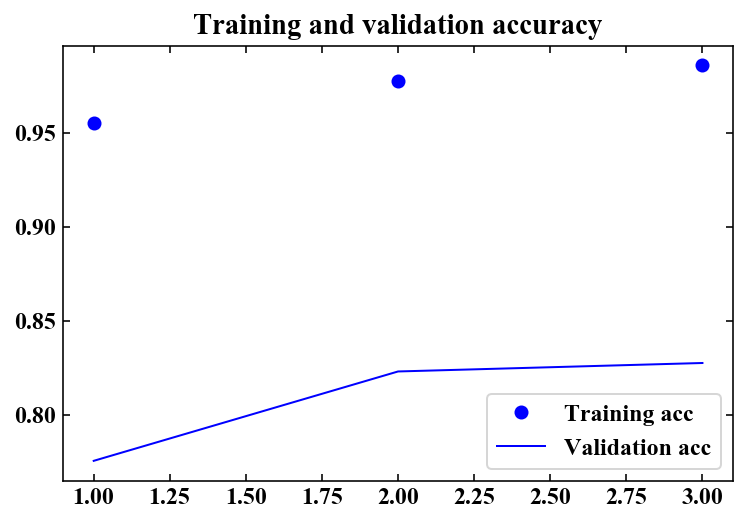

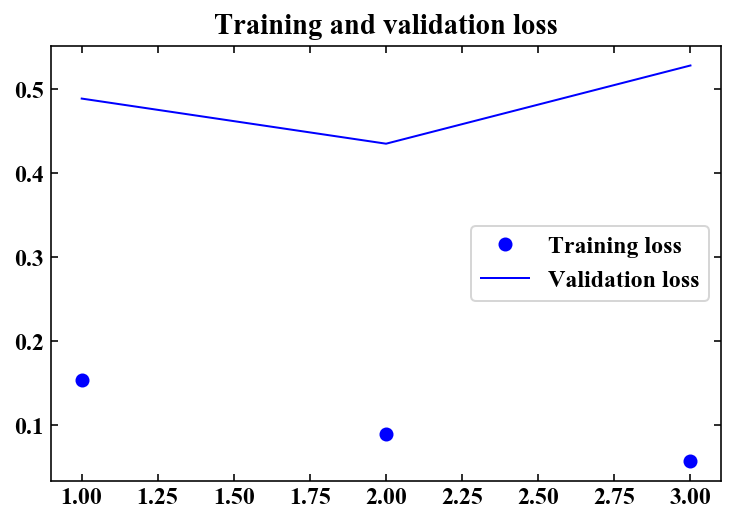

In [119]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()